In [2]:
pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
import keras.utils as image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [15]:
train_dir = 'content/cleaned/DATASET/TRAIN' #directory with training images
test_dir = 'content/cleaned/DATASET/TEST' #directory with testing images

### load the data set using the ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [17]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 862 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


# Data Visualization

In [18]:
def show_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

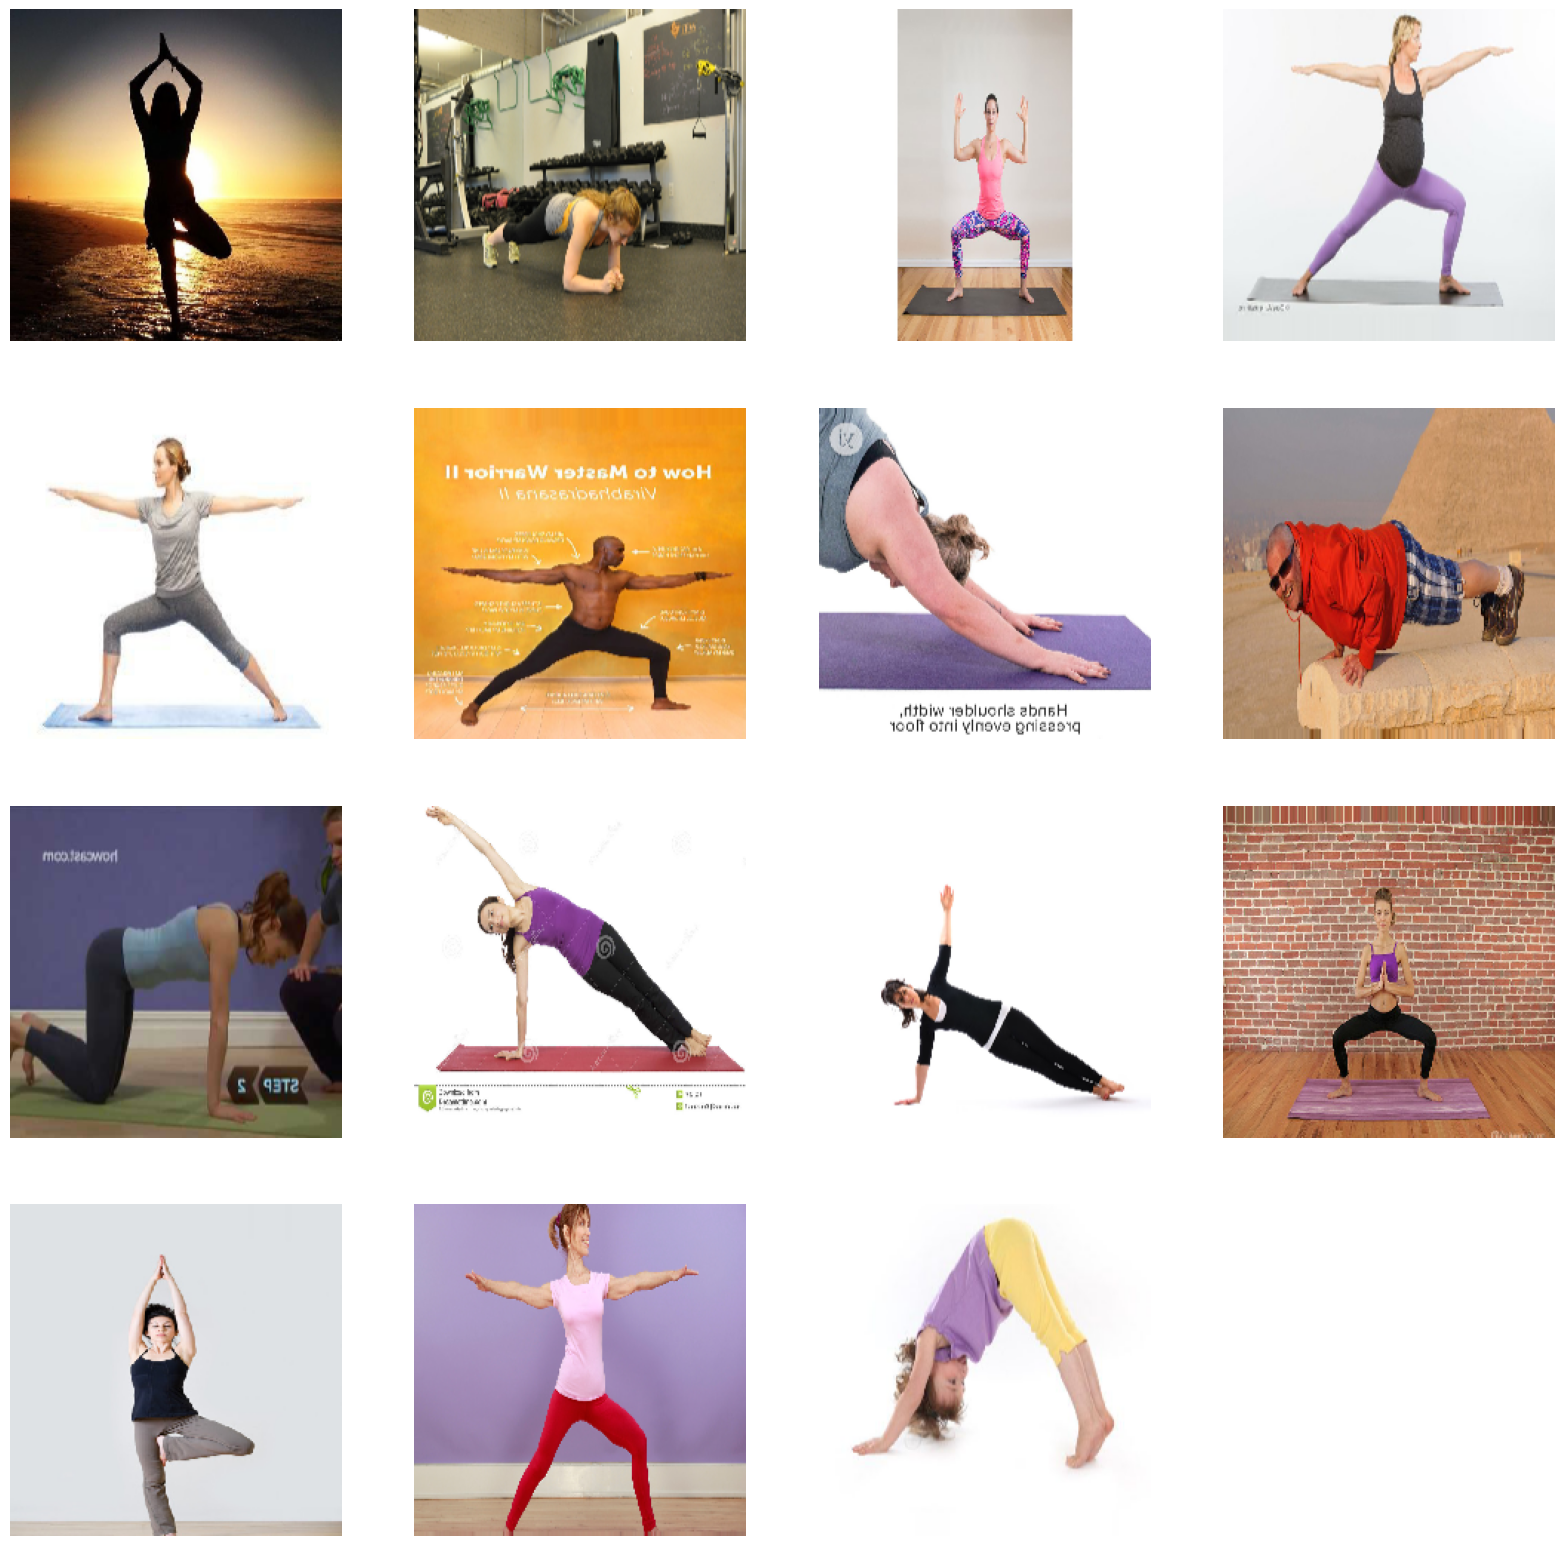

In [19]:
n = 1
plt.figure(figsize=(20,25))
for images, labels in train_generator:
    plt.subplot(5,4,n)
    show_image(images[n])
    n+=1
    if n>=16:
        break
plt.show()

# Model

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [28]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50 
batch_size = 16

In [29]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 56, 56, 128)      

In [30]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [31]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator)

Epoch 1/50
54/54 [==============================] - 417s 8s/step - loss: 5.6115 - accuracy: 0.2239 - val_loss: 1.6060 - val_accuracy: 0.2333
Epoch 2/50
54/54 [==============================] - 311s 6s/step - loss: 1.6038 - accuracy: 0.2343 - val_loss: 1.5988 - val_accuracy: 0.2333
Epoch 3/50
54/54 [==============================] - 309s 6s/step - loss: 1.5822 - accuracy: 0.2668 - val_loss: 1.4698 - val_accuracy: 0.3889
Epoch 4/50
54/54 [==============================] - 328s 6s/step - loss: 1.5084 - accuracy: 0.3411 - val_loss: 1.3022 - val_accuracy: 0.5889
Epoch 5/50
48/54 [=========================>....] - ETA: 33s - loss: 1.3659 - accuracy: 0.4282

KeyboardInterrupt: 

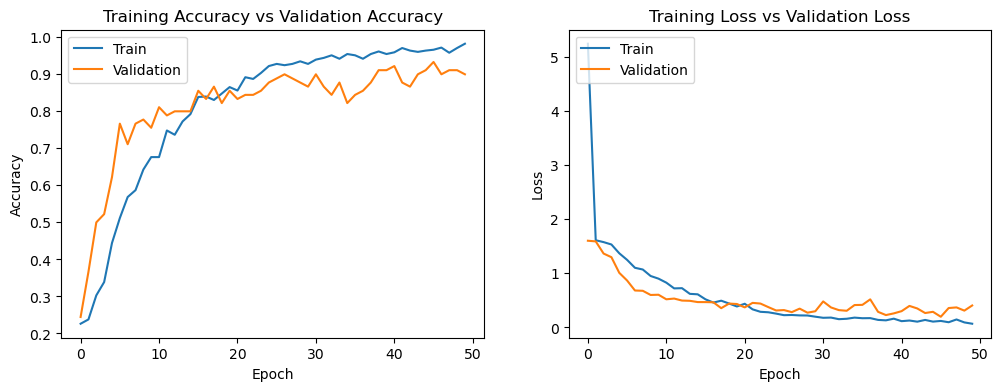

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [11]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

3/3 [==============================] - 6s 2s/step - loss: 0.4054 - accuracy: 0.9000
final train accuracy = 99.65 , validation accuracy = 90.00


In [12]:
model.save('YogaNet_model.h5')

In [3]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('YogaNet_model.h5')
img = image.load_img('1.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes) 

1/1 [==============================] - 0s 445ms/step
[[0. 0. 1. 0. 0.]]


# Model2:Xception 

In [32]:
from tensorflow.keras.applications import Xception

base_model = Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(256,256,3)
)
base_model.trainable=False

In [33]:
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import EarlyStopping


In [34]:
model2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
#     Dropout(0.4),
#     Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(5, activation='softmax')
])

In [35]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
callbacks = [EarlyStopping(patience=3, restore_best_weights=True)]


In [36]:
 model2.fit(
     train_generator,
     validation_data=validation_generator,
     epochs=50
)

Epoch 1/50
54/54 [==============================] - 122s 2s/step - loss: 1.0491 - accuracy: 0.5916 - val_loss: 0.3266 - val_accuracy: 0.9556
Epoch 2/50
54/54 [==============================] - 112s 2s/step - loss: 0.6030 - accuracy: 0.7807 - val_loss: 0.2594 - val_accuracy: 0.9111
Epoch 3/50
54/54 [==============================] - 117s 2s/step - loss: 0.4510 - accuracy: 0.8538 - val_loss: 0.2396 - val_accuracy: 0.9000
Epoch 4/50
54/54 [==============================] - 143s 3s/step - loss: 0.3592 - accuracy: 0.8770 - val_loss: 0.2069 - val_accuracy: 0.9000
Epoch 5/50
54/54 [==============================] - 118s 2s/step - loss: 0.3410 - accuracy: 0.8828 - val_loss: 0.1856 - val_accuracy: 0.9556
Epoch 6/50
54/54 [==============================] - 118s 2s/step - loss: 0.2725 - accuracy: 0.9165 - val_loss: 0.2121 - val_accuracy: 0.9222
Epoch 7/50
54/54 [==============================] - 117s 2s/step - loss: 0.2559 - accuracy: 0.9130 - val_loss: 0.2049 - val_accuracy: 0.9444
Epoch 8/50
54

In [37]:
model2.evaluate(validation_generator)

3/3 [==============================] - 8s 2s/step - loss: 0.2173 - accuracy: 0.9556


[0.2173103541135788, 0.9555555582046509]

In [39]:
model2.save('Yoga.h5')

In [41]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model2 = load_model('Yoga.h5')
img = image.load_img('1.jpg', target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model2.predict(img_data)
print(classes) 

1/1 [==============================] - 2s 2s/step
[[0.         0.         0.         0.0040369  0.99596316]]


In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()